In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
(train_image, train_label) , (test_image, test_label)= tf.keras.datasets.mnist.load_data()

In [3]:
train_image.shape, train_image.dtype, train_label.shape, train_label.dtype

((60000, 28, 28), dtype('uint8'), (60000,), dtype('uint8'))

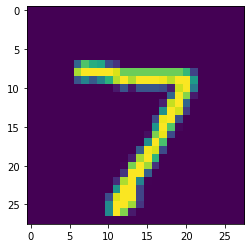

In [4]:
plt.imshow(test_image[0])

In [5]:
train_image = tf.expand_dims(train_image, -1)
test_image = tf.expand_dims(test_image, -1)

In [6]:
train_image = tf.cast(train_image/255, tf.float32)
test_image = tf.cast(test_image/255, tf.float32)

In [7]:
train_label = tf.cast(train_label, tf.int64)
test_label = tf.cast(test_label, tf.int64)

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((train_image, train_label))
test_dataset = tf.data.Dataset.from_tensor_slices((test_image, test_label))

In [9]:
dataset,test_dataset

(<TensorSliceDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>,
 <TensorSliceDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>)

In [10]:
dataset = dataset.shuffle(10000).batch(32)
test_dataset = test_dataset.batch(32)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, [3,3], activation='relu', input_shape=(None, None, 1)),
    tf.keras.layers.Conv2D(32, [3,3], activation='relu'),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(10)
])

In [12]:
optimizer = tf.keras.optimizers.Adam()

In [13]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [14]:
def loss(model, x, y):
    y_pred = model(x)
    return loss_func(y, y_pred)

In [15]:
train_loss = tf.keras.metrics.Mean('train_loss')
train_acc = tf.keras.metrics.SparseCategoricalAccuracy('train_acc')
test_loss = tf.keras.metrics.Mean('test_loss')
test_acc = tf.keras.metrics.SparseCategoricalAccuracy('test_acc')

In [16]:
def train_step(model, images, labels):
    with tf.GradientTape() as t:
        pred = model(images)
        loss_step = loss_func(labels, pred)
    grad = t.gradient(loss_step, model.trainable_variables)
    optimizer.apply_gradients(zip(grad, model.trainable_variables))
    train_loss(loss_step)
    train_acc(labels, pred)

In [17]:
def test_step(model, images, labels):
    pred = model(images)
    loss_step = loss_func(labels, pred)
    test_loss(loss_step)
    test_acc(labels, pred)

In [18]:
def train(num):
    for epoch in range(num):
        for (batch, (image, label)) in enumerate(dataset):
            train_step(model, image, label)
        print('Epoch %d : loss is %f, accuracy is %f ' % (epoch, train_loss.result(), train_acc.result()))
        
        for (batch, (image, label)) in enumerate(test_dataset):
            test_step(model, image, label)
        print('Epoch %d : test_loss is %f, test_accuracy is %f ' % (epoch, test_loss.result(), test_acc.result()))
        train_loss.reset_states()
        train_acc.reset_states()
        test_loss.reset_states()
        test_acc.reset_states()

In [19]:
ff ,ll = next(iter(test_dataset))

In [20]:
ff.shape,ll.shape

(TensorShape([32, 28, 28, 1]), TensorShape([32]))

In [21]:
pred1 = model(ff)

In [25]:
pred1.shape

TensorShape([32, 10])

In [28]:
tf.argmax(pred1, axis=1)

<tf.Tensor: id=214, shape=(32,), dtype=int64, numpy=
array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4])>

In [24]:
ll

<tf.Tensor: id=193, shape=(32,), dtype=int64, numpy=
array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1])>

In [25]:
a = tf.keras.metrics.SparseCategoricalAccuracy('acc')

In [26]:
a(ll, model(ff))

<tf.Tensor: id=254, shape=(), dtype=float32, numpy=0.15625>

In [27]:
b = tf.keras.metrics.Mean('loss')

In [28]:
b(loss_func(ll, model(ff)))

<tf.Tensor: id=312, shape=(), dtype=float32, numpy=2.3270078>

In [29]:
b.result().numpy()

2.3270078

In [30]:
train(10)

Epoch 0 : loss is 0.937083, accuracy is 0.712317 
Epoch 0 : test_loss is 0.508946, test_accuracy is 0.836500 
Epoch 1 : loss is 0.454652, accuracy is 0.856733 
Epoch 1 : test_loss is 0.369191, test_accuracy is 0.885300 
Epoch 2 : loss is 0.367509, accuracy is 0.883567 
Epoch 2 : test_loss is 0.309606, test_accuracy is 0.901600 
Epoch 3 : loss is 0.298453, accuracy is 0.906000 
Epoch 3 : test_loss is 0.251435, test_accuracy is 0.924100 
Epoch 4 : loss is 0.262985, accuracy is 0.916550 
Epoch 4 : test_loss is 0.228749, test_accuracy is 0.930600 
Epoch 5 : loss is 0.240649, accuracy is 0.924417 
Epoch 5 : test_loss is 0.219644, test_accuracy is 0.933000 
Epoch 6 : loss is 0.224984, accuracy is 0.930083 
Epoch 6 : test_loss is 0.200532, test_accuracy is 0.939700 
Epoch 7 : loss is 0.214037, accuracy is 0.932550 
Epoch 7 : test_loss is 0.212018, test_accuracy is 0.931700 
Epoch 8 : loss is 0.204849, accuracy is 0.935417 
Epoch 8 : test_loss is 0.203712, test_accuracy is 0.934500 
Epoch 9 : 